In [ ]:
!pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8MB 40kB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 450kB 48.2MB/s 
     |████████████████████████████████| 3.9MB 43.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=f13b1f670a54eb98d763f58210579827ee1c69d3557a16f0df60c997aec9c1e5
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninsta

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import plotly.express as px

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/My Drive/Saturdays/waste_images_1000perClass/train'
valid_path = '/content/drive/My Drive/Saturdays/waste_images_1000perClass/valid'
test_path = '/content/drive/My Drive/Saturdays/waste_images_1000perClass/test'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input) \
.flow_from_directory(directory=train_path, target_size=(299,299), classes=['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash','organic'], batch_size=10)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input) \
.flow_from_directory(directory=valid_path, target_size=(299,299), classes=['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash','organic'], batch_size=10)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_resnet_v2.preprocess_input) \
.flow_from_directory(directory=test_path, target_size=(299,299), classes=['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash','organic'], batch_size=10, shuffle=False)

Found 4200 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.
Found 1400 images belonging to 7 classes.


In [ ]:
1400/32 #113 y 38

43.75

In [ ]:
imgs, labels = next(train_batches)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 10, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

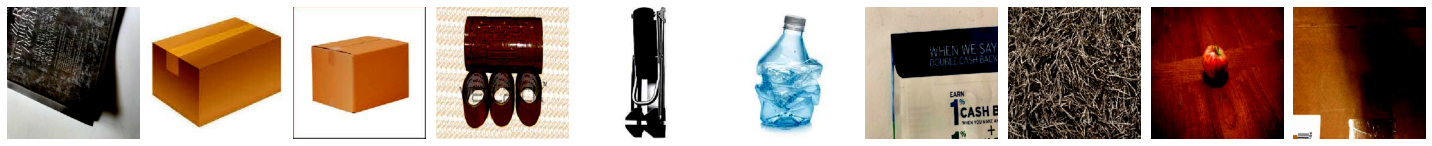

[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [ ]:
plotImages(imgs)
print(labels)

### InceptionResNetV2

*   https://medium.com/@zahraelhamraoui1997/inceptionresnetv2-simple-introduction-9a2000edcdb6
*   https://medium.com/the-owl/building-inception-resnet-v2-in-keras-from-scratch-a3546c4d93f0
*   https://github.com/fchollet/deep-learning-models/blob/master/inception_resnet_v2.py


In [ ]:
# Importamos librerías necesarias para el modelo
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [ ]:
base_model = InceptionResNetV2(include_top=True, weights = 'imagenet', classes=1000, pooling='avg') # classifier_activation="softmax")

In [ ]:
# add a global spatial average pooling layer
x = base_model.output
# let's add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer -- let's say we have 6 classes
predictions = Dense(7, activation='softmax')(x)

In [ ]:
# this is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# first: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# compile the model (should be done *after* setting layers to non-trainable)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_1st= model.fit(x=train_batches, steps_per_epoch=420, validation_steps=140, validation_data=valid_batches, epochs=30, verbose=1,)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 420 steps, validate for 140 steps
Epoch 1/30
420/420 [==============================] - 175s 416ms/step - loss: 1.2977 - accuracy: 0.6088 - val_loss: 0.8736 - val_accuracy: 0.7343
Epoch 2/30
420/420 [==============================] - 162s 385ms/step - loss: 0.8356 - accuracy: 0.7179 - val_loss: 1.0477 - val_accuracy: 0.7421
Epoch 3/30
420/420 [==============================] - 162s 385ms/step - loss: 0.7478 - accuracy: 0.7445 - val_loss: 1.1889 - val_accuracy: 0.7357
Epoch 4/30
420/420 [==============================] - 162s 385ms/step - loss: 0.7081 - accuracy: 0.7590 - val_loss: 1.2665 - val_accuracy: 0.7400
Epoch 5/30
420/420 [==============================] - 162s 385ms/step - loss: 0.6761 - accuracy: 0.7717 - val_loss: 1.3394 - val_accuracy: 0.7414
Epoch 6/30
420/420 [==============================] - 162s 386ms/step - loss: 0.6533 - accuracy: 0.7798 - val_loss: 1.4434 - val_accuracy: 0.7371
Epoch 7/30
420/420 [==========

In [ ]:
#salvamos el modelo completo 
model.save("/content/drive/My Drive/Saturdays/InceptionResnetV2.h5")
print("Saved to drive")

Saved to drive


In [ ]:
def graph_metrics(x,val_acc,val_loss, acc, loss, title):
  fig, (ax1, ax2) = plt.subplots(2, 1, constrained_layout=True)
  ax1.plot(x, loss, label='Train')
  ax1.plot(x, val_loss, label='Validation')
  ax1.set_title('Loss')
  ax1.set(xlabel='Epochs', ylabel='Loss')
  ax1.legend()
  ax2.plot(x, acc, label='Train')
  ax2.plot(x, val_acc, label='Validation')
  ax2.set_title('Accuracy')
  ax2.set(xlabel='Epochs', ylabel='Accuracy')
  ax2.legend()
  fig.suptitle(title, fontsize=16)

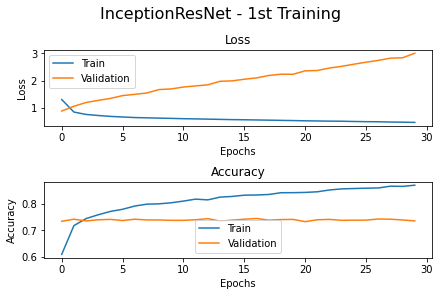

In [ ]:
epochs = 30
title_1 = 'InceptionResNet - 1st Training'
acc = history_1st.history['accuracy']
loss = history_1st.history['loss']
val_acc = history_1st.history['val_accuracy']
val_loss = history_1st.history['val_loss']
x = range(epochs)

graph_metrics(x,val_acc,val_loss, acc, loss, title_1)

In [ ]:
# Fine tunning of model
# at this point, the top layers are well trained and we can start fine-tuning
# convolutional layers. We will freeze the bottom N layers
# and train the remaining top layers.

# let's visualize layer names and layer indices to see how many layers
# we should freeze:
for i, layer in enumerate(base_model.layers):
   print(i, layer.name)

In [ ]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 249 layers and unfreeze the rest:
for layer in model.layers[:779]:
   layer.trainable = False
for layer in model.layers[779:]:
   layer.trainable = True

In [ ]:
# we need to recompile the model for these modifications to take effect
# we use SGD with a low learning rate
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_2nd = model.fit(x=train_batches, steps_per_epoch=420, validation_steps=140, validation_data=valid_batches, epochs=30, verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 420 steps, validate for 140 steps
Epoch 1/30
420/420 [==============================] - 174s 415ms/step - loss: 0.4349 - accuracy: 0.8793 - val_loss: 2.9323 - val_accuracy: 0.7386
Epoch 2/30
420/420 [==============================] - 162s 386ms/step - loss: 0.4087 - accuracy: 0.8821 - val_loss: 2.8970 - val_accuracy: 0.7386
Epoch 3/30
420/420 [==============================] - 162s 386ms/step - loss: 0.3940 - accuracy: 0.8838 - val_loss: 2.8794 - val_accuracy: 0.7400
Epoch 4/30
420/420 [==============================] - 162s 386ms/step - loss: 0.3829 - accuracy: 0.8874 - val_loss: 2.8721 - val_accuracy: 0.7414
Epoch 5/30
420/420 [==============================] - 162s 386ms/step - loss: 0.3737 - accuracy: 0.8879 - val_loss: 2.8680 - val_accuracy: 0.7429
Epoch 6/30
420/420 [==============================] - 162s 386ms/step - loss: 0.3661 - accuracy: 0.8893 - val_loss: 2.8591 - val_accuracy: 0.7429
Epoch 7/30
420/420 [==========

In [ ]:
#salvamos el modelo completo 
model.save("/content/drive/My Drive/Saturdays/InceptionResnetV2_Tunning.h5")
print("Saved to drive")

Saved to drive


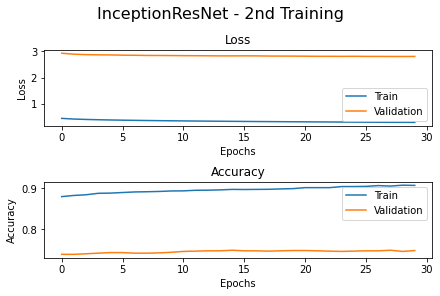

In [ ]:
epochs = 30
title_2 = 'InceptionResNet - 2nd Training'
acc = history_2nd.history['accuracy']
loss = history_2nd.history['loss']
val_acc = history_2nd.history['val_accuracy']
val_loss = history_2nd.history['val_loss']
x = range(epochs)

graph_metrics(x,val_acc,val_loss, acc, loss, title_2)

In [ ]:
model.evaluate(x=test_batches,verbose=1,steps=140)

  ...
    to  
  ['...']
140/140 [==============================] - 959s 7s/step - loss: 2.7072 - accuracy: 0.7286


[2.7072035100700176, 0.7285714]

# Predicción


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

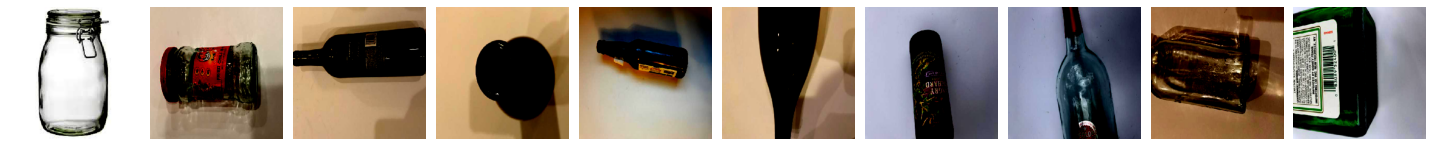

[[1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]


In [ ]:
test_imgs, test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [ ]:
test_batches.classes

array([0, 0, 0, ..., 6, 6, 6], dtype=int32)

In [ ]:
predictions = model.predict(x=test_batches, verbose=1, steps=140)

140/140 [==============================] - 38s 274ms/step


In [ ]:
np.round(predictions)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
test_batches.class_indices

{'cardboard': 2,
 'glass': 0,
 'metal': 4,
 'organic': 6,
 'paper': 1,
 'plastic': 3,
 'trash': 5}

Confusion matrix, without normalization
[[141   0   1  21  28   5   4]
 [  0 125  28   8  19  10  10]
 [  1  26 150   5   7   5   6]
 [  9   6   5 138  26  13   3]
 [  9   5   1  15 153   9   8]
 [  2   3  10  11  15 151   8]
 [  1  11   8   4   8   6 162]]


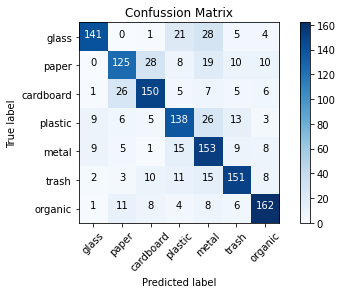

In [ ]:
cm_plot_labels = ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash', 'organic']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confussion Matrix')

Salva el modelo ya entrenado en JSON

In [ ]:
%cd '/content/drive/My Drive/Saturdays'

In [ ]:
json_file = model.to_json()
with open('model4.json','w') as file:
    file.write(json_file)

model.save_weights('model4.h5')


#Prueba Imágenes propias

##Carga MOdelo


In [12]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.densenet import preprocess_input
from google.colab.patches import cv2_imshow

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input

In [14]:
%cd '/content/drive/My Drive/Saturdays AI - Equipo Dorado/Código/Modelo_entrenado_InceptionResNetV2'

/content/drive/.shortcut-targets-by-id/1KPE1_bisaXAVeGCEpslXs7eEQdvkWl8M/Saturdays AI - Equipo Dorado/Código/Modelo_entrenado_InceptionResNetV2


In [ ]:
# load model
model_use = load_model('InceptionResnetV2_Tunning.h5')
# summarize model.
model_use.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1015 (Conv2D)            (None, 149, 149, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1015 (Batch (None, 149, 149, 32) 96          conv2d_1015[0][0]                
__________________________________________________________________________________________________
activation_1015 (Activation)    (None, 149, 149, 32) 0           batch_normalization_1015[0][0]   
____________________________________________________________________________________________

In [19]:
%cd '/content/drive/My Drive/Saturdays'

/content/drive/My Drive/Saturdays


<class 'tensorflow.python.framework.ops.EagerTensor'>


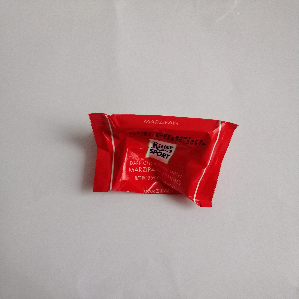

Class: paper 91.01%


In [36]:
# Preprocessing of image
img_name = 'test4.jpg'

classes = ['cardboard','glass','metal','organic','paper','plastic','trash']
image = tf.image.decode_jpeg(tf.io.read_file(img_name), channels=3)
image_dim = np.expand_dims(image, axis=0)
image_res = tf.image.resize_with_pad(image_dim, 299, 299, method='bilinear', antialias=True)
print(type(image))

image_pre = tf.keras.applications.inception_resnet_v2.preprocess_input(image_res)

img_disp = cv2.imread(img_name, cv2.IMREAD_COLOR)
img_disp = cv2.resize(img_disp, (299, 299))
cv2_imshow(img_disp)

results = model_use.predict(image_pre)
print('Class: ' + classes[np.argmax(results)] + ' ' + str(round(results[0,np.argmax(results)]*100, 2)) + '%')

Se puede agregar el preprocesamiento de las imágenes dentro del modelo como una capa extra